In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Deep_learning_challenge/charity_data.csv"

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv(path)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df= application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE

application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

app_col=application_df["APPLICATION_TYPE"].value_counts()
app_col

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

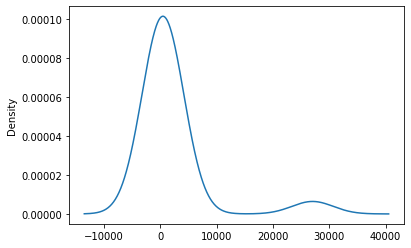

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [9]:
# Replace in dataframe
application_types_to_replace = app_col[app_col < 750].index.tolist()

for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

classification_col= application_df["CLASSIFICATION"].value_counts()
classification_col.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1257        5
C1600        5
C0           3
C1260        3
C2710        3
C1267        2
C3200        2
C1246        2
C1234        2
C1256        2
C1580        1
C2600        1
C1236        1
C1370        1
C3700        1
Name: CLASSIFICATION, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

classifications_to_replace= classification_col[classification_col <750].index.tolist()

for clase in classifications_to_replace:
    application_df.CLASSIFICATION=application_df.CLASSIFICATION.replace(clase, "Other")
    
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE

application_cgl=application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_df[application_cgl].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance 
enc= OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder unsing categorical list 
encode_df= pd.DataFrame(enc.fit_transform(application_df[application_cgl]))

# Add the encoded variable names to the dataframe 
encode_df.columns= enc.get_feature_names(application_cgl)
encode_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge One-Hot encoded features and drop the originals
prep_application_df= application_df.merge(encode_df,left_index=True, right_index=True).drop(columns= application_cgl)
prep_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# ATTEMPT # 1

Dropping somne noisy features, 2 hidden layers (80, 30 neurons)

In [17]:
# Going to delete columns that are unnecessary and run NN
print(len(prep_application_df.columns))

42


In [18]:
prep_application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AM

In [19]:
# Going to Drop the following:
temp_application_df= prep_application_df.drop(columns= ["USE_CASE_Other","AFFILIATION_Other"])
temp_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split the preprocessed data 
y=temp_application_df["IS_SUCCESSFUL"].values
X=temp_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [21]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3200      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,761
Trainable params: 9,761
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5734 - accuracy: 0.7201
Epoch 2/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5592 - accuracy: 0.7285
Epoch 3/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5556 - accuracy: 0.7293
Epoch 4/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5539 - accuracy: 0.7299
Epoch 5/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5525 - accuracy: 0.7316
Epoch 6/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5518 - accuracy: 0.7298
Epoch 7/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5510 - accuracy: 0.7314
Epoch 8/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7325
Epoch 9/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5499 - accuracy: 0.7332
Epoch 10/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5492 - accura

# ATTEMPT # 2

3 hidden layers (80, 30, 15 neurons)

In [24]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3200      
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 15)                1215      
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,911
Trainable params: 10,911
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5741 - accuracy: 0.7183
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5573 - accuracy: 0.7297
Epoch 3/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7310
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7309
Epoch 5/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5517 - accuracy: 0.7326
Epoch 6/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5508 - accuracy: 0.7329
Epoch 7/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7329
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5495 - accuracy: 0.7339
Epoch 9/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7338
Epoch 10/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5482 - accura

# Attempt # 3

Changing Activation Function

In [26]:
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="sigmoid"))

# Third Hidden Layer
nn3.add(tf.keras.layers.Dense(units= hidden_node3, activation="sigmoid"))

# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3200      
                                                                 
 dense_8 (Dense)             (None, 80)                6480      
                                                                 
 dense_9 (Dense)             (None, 15)                1215      
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,911
Trainable params: 10,911
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5365 - accuracy: 0.7392
Epoch 2/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7398
Epoch 3/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5364 - accuracy: 0.7401
Epoch 4/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7393
Epoch 5/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7392
Epoch 6/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7389
Epoch 7/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5362 - accuracy: 0.7398
Epoch 8/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5360 - accuracy: 0.7395
Epoch 9/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5362 - accuracy: 0.7394
Epoch 10/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5361 - accura

# Attemp # 4

Original data with redistribution of the neurons

In [30]:
# Split the preprocessed data 
y=prep_application_df["IS_SUCCESSFUL"].values
X=prep_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [31]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 35
hidden_node3=10

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn4.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                3360      
                                                                 
 dense_12 (Dense)            (None, 80)                6480      
                                                                 
 dense_13 (Dense)            (None, 10)                810       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,661
Trainable params: 10,661
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model 
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn4.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn4.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5705 - accuracy: 0.7230
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5574 - accuracy: 0.7277
Epoch 3/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5548 - accuracy: 0.7310
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5532 - accuracy: 0.7302
Epoch 5/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5514 - accuracy: 0.7330
Epoch 6/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5504 - accuracy: 0.7321
Epoch 7/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7323
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5502 - accuracy: 0.7330
Epoch 9/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5491 - accuracy: 0.7325
Epoch 10/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5487 - accura

Original data with redistribution of neurons gives the higher accuracy

In [36]:
# Export our model to HDF5 file
nn4.save("AlphabetSoupCharity_optimzation.h5")